<a href="https://colab.research.google.com/github/joaramirezra/Mineral-Border-Dectetion/blob/Johan/proyecto_geoimagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# border Detection notebook

This notebook aims to help geologist or anyone who need to create an algorithm for detecting edges in a mineral or element that's contained into a thin section, also this will help to mask different kind of elements that need to be classified



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import cv2
import requests
import io
import PIL
from matplotlib import pyplot as plt

# Functions

In [2]:
def preprocess(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  bilateral = cv2.bilateralFilter(img,9,150,75)
  gray_bilateral = cv2.bilateralFilter(gray,9,75,75)
  dinamic_threehold =  cv2.adaptiveThreshold(gray_bilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
  # Enmascarada = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return img, gray, bilateral, gray_bilateral,dinamic_threehold
  
def print_images(*images):
  subplots = len(images)

  plt.figure(figsize=(15,5))
  for i,img in enumerate(images) :
    plt.subplot(1,subplots,(i+1))
    plt.imshow(img,interpolation='none')
  plt.grid(0)
  plt.show()

# Load image from url 

In [3]:
response = requests.get("http://www.ehu.eus/mineralogiaoptica/images/cuarzo3xp_gr-06-3-6-5mm--460.jpg")
image_bytes = io.BytesIO(response.content)
img = PIL.Image.open(image_bytes)
img.save("geeks.jpg") 

# Show image recently load 

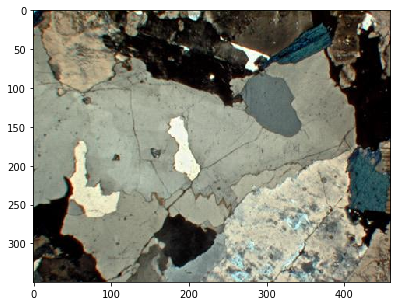

In [4]:
# this is just a test if the img is well readed
img = cv2.imread("geeks.jpg",1)
print_images(img)

# Pre-process evaluation

# First aproach 

Considering that I will start to use a well defined edge thin section with minerals like quartz and similar morphology, the previous process will focus on detecting large grains rather than inclusions or similars.

To achive that goal the first I must define wich color chanel I must worl.

---

from the 4th paper I found that :

> *we discuss how various color models are use in finding the saliency map. The RGB color map is use for color feature extraction. The HSV (hue, saturation, value) discus the brightness of the color image. And the YCbCr means grey level luminance and chrominance which is use for shade distribution.*

given this information I consider to began the process with the following chanels :

- RGB 
- HSV
- HSL
- YCBCR

so I proced to change channels and see the behivor in histogram and imgages

In [5]:
def img_color_channel_change(img):
  # RGB
  img_red,img_green,img_blue = cv2.split(img)
  # Gray
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # HSV hue-saturation-value
  img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  img_h,img_s,img_v = cv2.split(img_hsv)
  # HSL hue-saturation-lightness
  img_hsL = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
  img_h2,img_s2,img_v2 = cv2.split(img_hsv)
  # YCBCR
  img_YBR = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
  img_Y,img_B2,img_R2 = cv2.split(img_YBR)

  return img_hsv,img_hsL,img_YBR,img_gray

def plot_hist(img):
  plt.figure(figsize=(20,4))
  color = ('b','g','r')

  for i,col in enumerate(color):
      histr = cv2.calcHist([img],[i],None,[256],[0,256])
      plt.plot(histr,color = col,drawstyle='steps-pre')
      plt.xlim([0,256])
  plt.grid(1)
  plt.show()

# Discussion Color change 

First thing I saw on the change of color channel is that  for edge detection is importan to reduce the noise coming from inclusions, it can be found specially in the HSL and HSV chanel where some cristals has well defined edges but inside has a lot minerals, that could be a problem in others thin sections


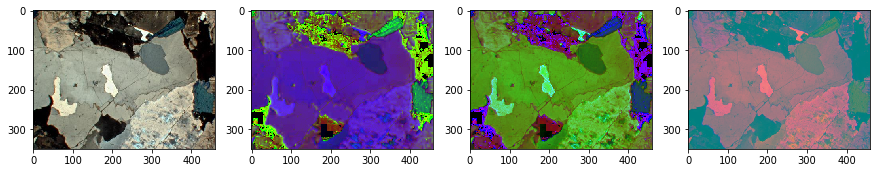

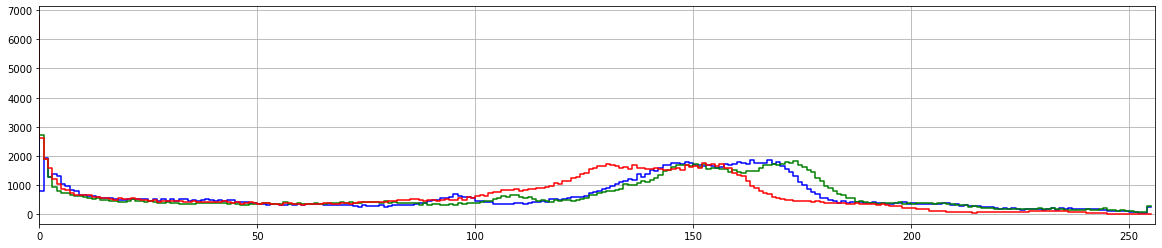

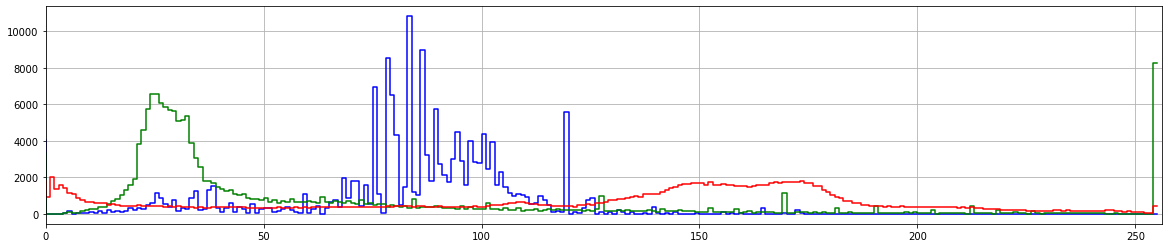

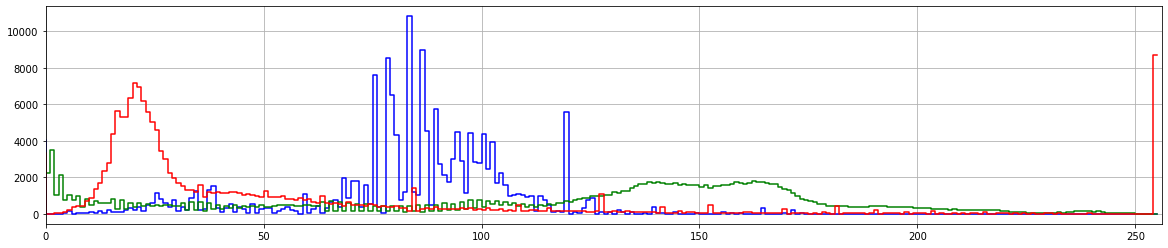

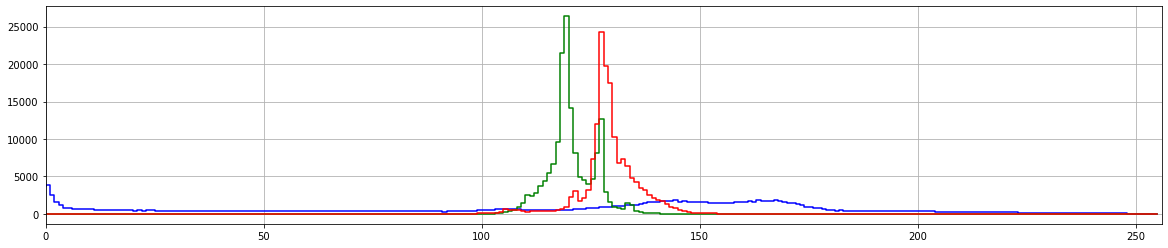

In [6]:
img_hsv,img_hsL,img_YBR,img_gray = img_color_channel_change(img)
print_images(img,img_hsv,img_hsL,img_YBR)
plot_hist(img)
plot_hist(img_hsv)
plot_hist(img_hsL)
plot_hist(img_YBR)

In [ ]:
img2 = img
for i in range(10,256,10):  
  mask = cv2.inRange(img_hsv, i-10, i)
  res = cv2.bitwise_and(img2, img2, mask=mask)
  print_images(res)

# Second aproach 

make some goblal operation , with this aproach I want to explore the following global operation : 


*  Hough Transformation
*  Hadamard Transformation 
*  Karhunen Transfomation 

with this transformation I focusing in future work with the use of convolutuional network to generate a first clasification 
 

# Third aproach 

once is define wich is the best color channel to work and if there is necessary a global transformation to improve the convolution process to detected edges now is time to reduce mineral noises, this can reduce inclusions in minerals and some features of interest, but as we said we want to detect macro minerals and then mask to classified the mineral , is necessary to made some blur in the image

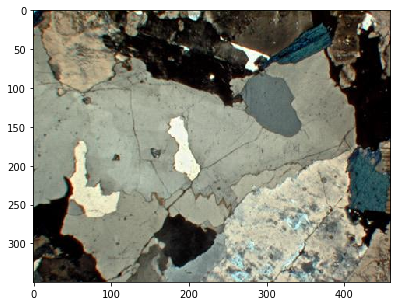

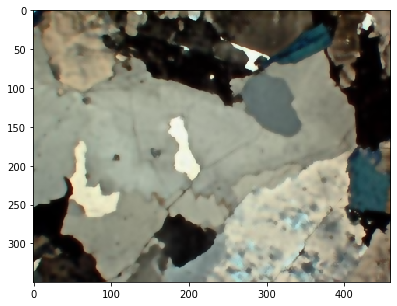

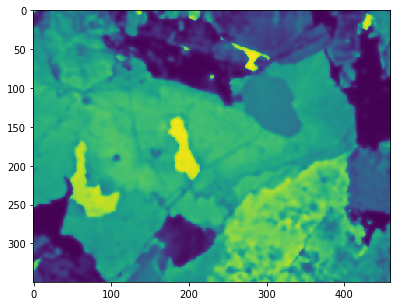

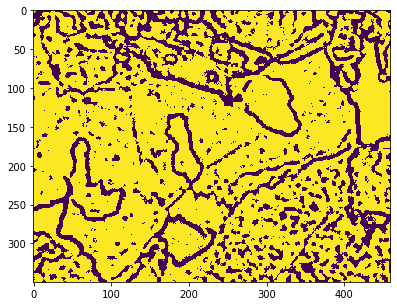

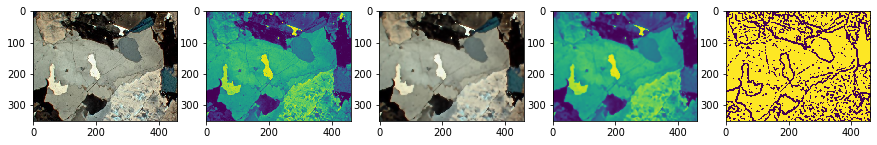

In [8]:
img, gray, bilateral, gray_bilateral,dinamic_threehold = preprocess(img)
print_images(img)
print_images(bilateral)
print_images(gray_bilateral)
print_images(dinamic_threehold)

print_images(img, gray, bilateral, gray_bilateral,dinamic_threehold)

In [9]:
def find_counturs(img):
  img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
  
  edges = cv2.Canny(th2,100,200)

  # contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print(' Number of countours : ' , len(contours))
  # # cv2.drawContours(img2, contours, 0,(250,0,0), 2)
  print_images(img,th2,edges)

pixel diameter =  0


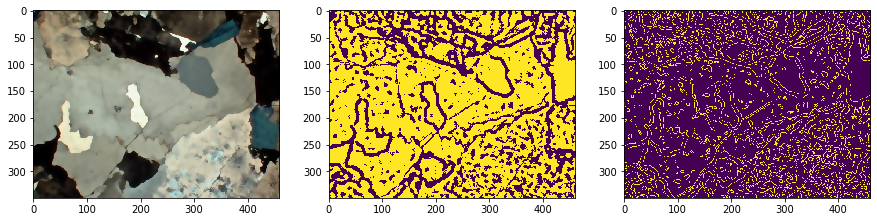

pixel diameter =  1


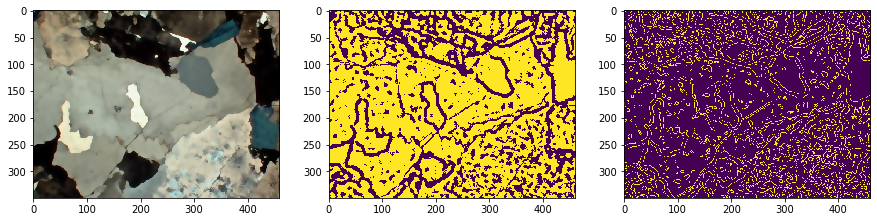

pixel diameter =  2


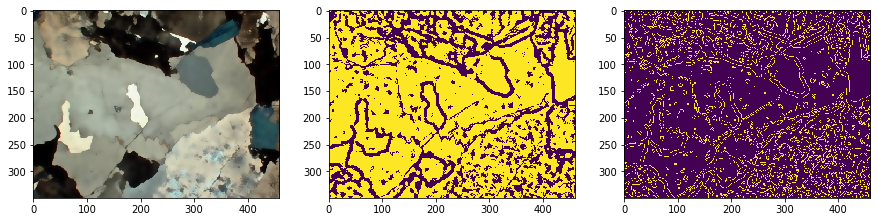

pixel diameter =  3


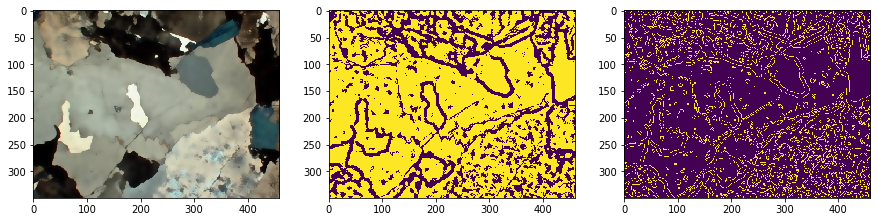

pixel diameter =  4


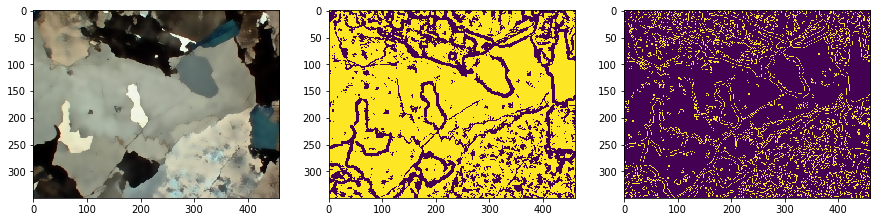

pixel diameter =  5


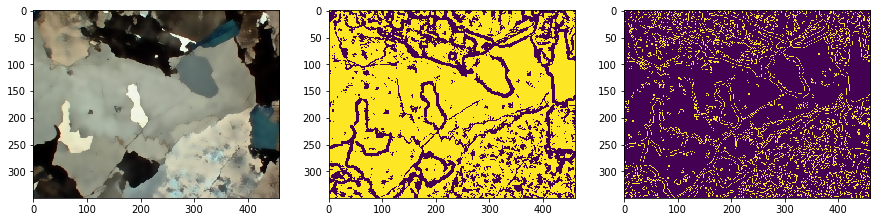

pixel diameter =  6


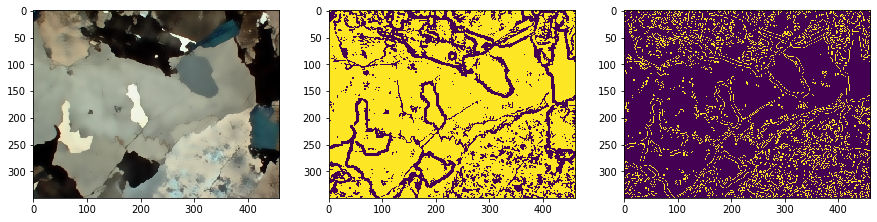

pixel diameter =  7


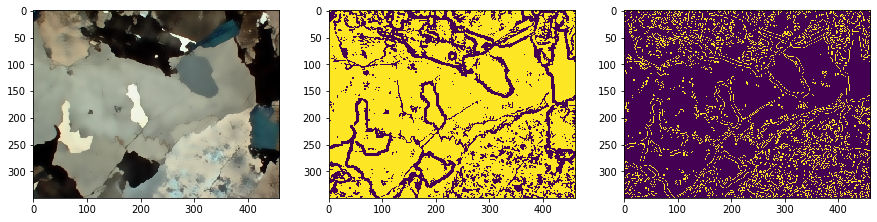

pixel diameter =  8


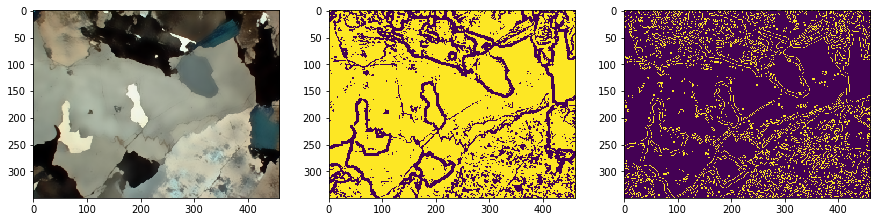

In [10]:
import time 
bilateral =[cv2.bilateralFilter(img,i,100,75) for i in range(10,19)]
for i,bilateral_image in enumerate(bilateral):
  print('pixel diameter = ',i )
  find_counturs(bilateral_image) 
  time.sleep(2)

# bibliografia

1. [Mineral grains recognition using computer vision and machine learning](https://www.sciencedirect.com/science/article/pii/S0098300419301037)
2. [dentification of Mineral Grains in a Petrographic Thin Section Using Phi- and Max-Images](https://link.springer.com/article/10.1023/B:MATG.0000041179.79093.87)
3. [Mineral Grain Boundary Detection With Image Processing Method: From Edge Detection Operation To Level Set Technique ](https://www.intechopen.com/books/image-segmentation/mineral-grain-boundary-detection-with-image-processing-method-from-edge-detection-operation-to-level)
4. [Comparative Study of RGB, HSV & YCbCr
Color Model Saliency Map](https://www.researchgate.net/publication/340084223_Comparative_Study_of_Parallelism_and_Pipelining_of_RGB_to_HSL_Colour_Space_Conversion_Architecture_on_FPGA)

##### Copyright 2020 

Author : [Johan Ramirez](https://www.github.com/joaramirezra)


In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.